In [1]:
# Connect to drive folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import data set
import pandas as pd
import numpy as np
df_raw = pd.read_parquet(r'/content/drive/MyDrive/Norvartis Datathon/train_data.parquet')

In [3]:
# Check for missing values in the dataframe df_raw
missing_values_count = df_raw.isna().sum()

# Filter rows with missing values in "hospital_rate" or "main_channel" columns,
# and select specific columns for further analysis
df_nas = df_raw[(pd.isna(df_raw["hospital_rate"]) | pd.isna(df_raw["main_channel"]))][["hospital_rate", "main_channel", "ther_area"]]

# Display the first few rows of the filtered dataframe df_nas
display(df_nas.head())

# Print the count of non-missing values in df_nas
print(df_nas.notna().sum())

# Print unique values in the "main_channel" and "ther_area" columns of df_raw
print(df_raw.main_channel.unique())
print(df_raw.ther_area.unique())

,hospital_rate,main_channel,ther_area
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


hospital_rate         0
main_channel          0
ther_area        148549
dtype: int64
[NaN, 'RETAIL', 'HOSPITAL', 'OTHERS', 'COMBINED']
Categories (4, object): ['COMBINED', 'HOSPITAL', 'OTHERS', 'RETAIL']
[NaN, 'S', 'G', 'M', 'J', ..., 'D', 'H', 'V', 'B', 'P']
Length: 15
Categories (14, object): ['A', 'B', 'C', 'D', ..., 'P', 'R', 'S', 'V']


In [4]:
# Create a copy of the original df to keep the unmodified df as reference
df = df_raw.copy()

# Add unknown categories for variables with missing values
df['main_channel'] = df['main_channel'].cat.add_categories("Unknown")
df['ther_area'] = df['ther_area'].cat.add_categories("U")

# Fill missing values with "Unknown" for 'main_channel'
df['main_channel'].fillna("Unknown", inplace=True)
df['ther_area'].fillna("U", inplace=True)

# Now, you can fill missing values with 0 for 'hospital_rate'
df['hospital_rate'].fillna(0, inplace=True)

# Check for rows that were missing the_area
display(df[df["ther_area"] == "U"])

,brand,phase,country,dayweek,month,wd_perc,ther_area,hospital_rate,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,monthly,main_channel
0,AIMST,0.006284,Aldovia,2.0,1.0,0.045455,U,0.0,4.0,0.0,4,4,5,5,4,2013-01-02,1,21,0.008092,Unknown
1,AIMST,0.123459,Aldovia,3.0,1.0,0.090909,U,0.0,0.0,0.0,4,4,5,5,4,2013-01-03,2,20,0.008092,Unknown
2,AIMST,0.055607,Aldovia,4.0,1.0,0.136364,U,0.0,0.0,2.0,4,4,5,5,4,2013-01-04,3,19,0.008092,Unknown
3,AIMST,0.032148,Aldovia,0.0,1.0,0.181818,U,0.0,2.0,0.0,4,4,5,5,4,2013-01-07,4,18,0.008092,Unknown
4,AIMST,0.097054,Aldovia,1.0,1.0,0.227273,U,0.0,0.0,0.0,4,4,5,5,4,2013-01-08,5,17,0.008092,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3516620,XUJGO,0.000000,Zamunda,3.0,12.0,0.809524,U,0.0,0.0,3.0,4,4,5,5,3,2015-12-24,17,4,0.009396,Unknown
3516621,XUJGO,0.000000,Zamunda,0.0,12.0,0.857143,U,0.0,3.0,0.0,4,4,5,5,3,2015-12-28,18,3,0.009396,Unknown
3516622,XUJGO,0.000000,Zamunda,1.0,12.0,0.904762,U,0.0,0.0,0.0,4,4,5,5,3,2015-12-29,19,2,0.009396,Unknown
3516623,XUJGO,0.000006,Zamunda,2.0,12.0,0.952381,U,0.0,0.0,0.0,4,4,5,5,3,2015-12-30,20,1,0.009396,Unknown


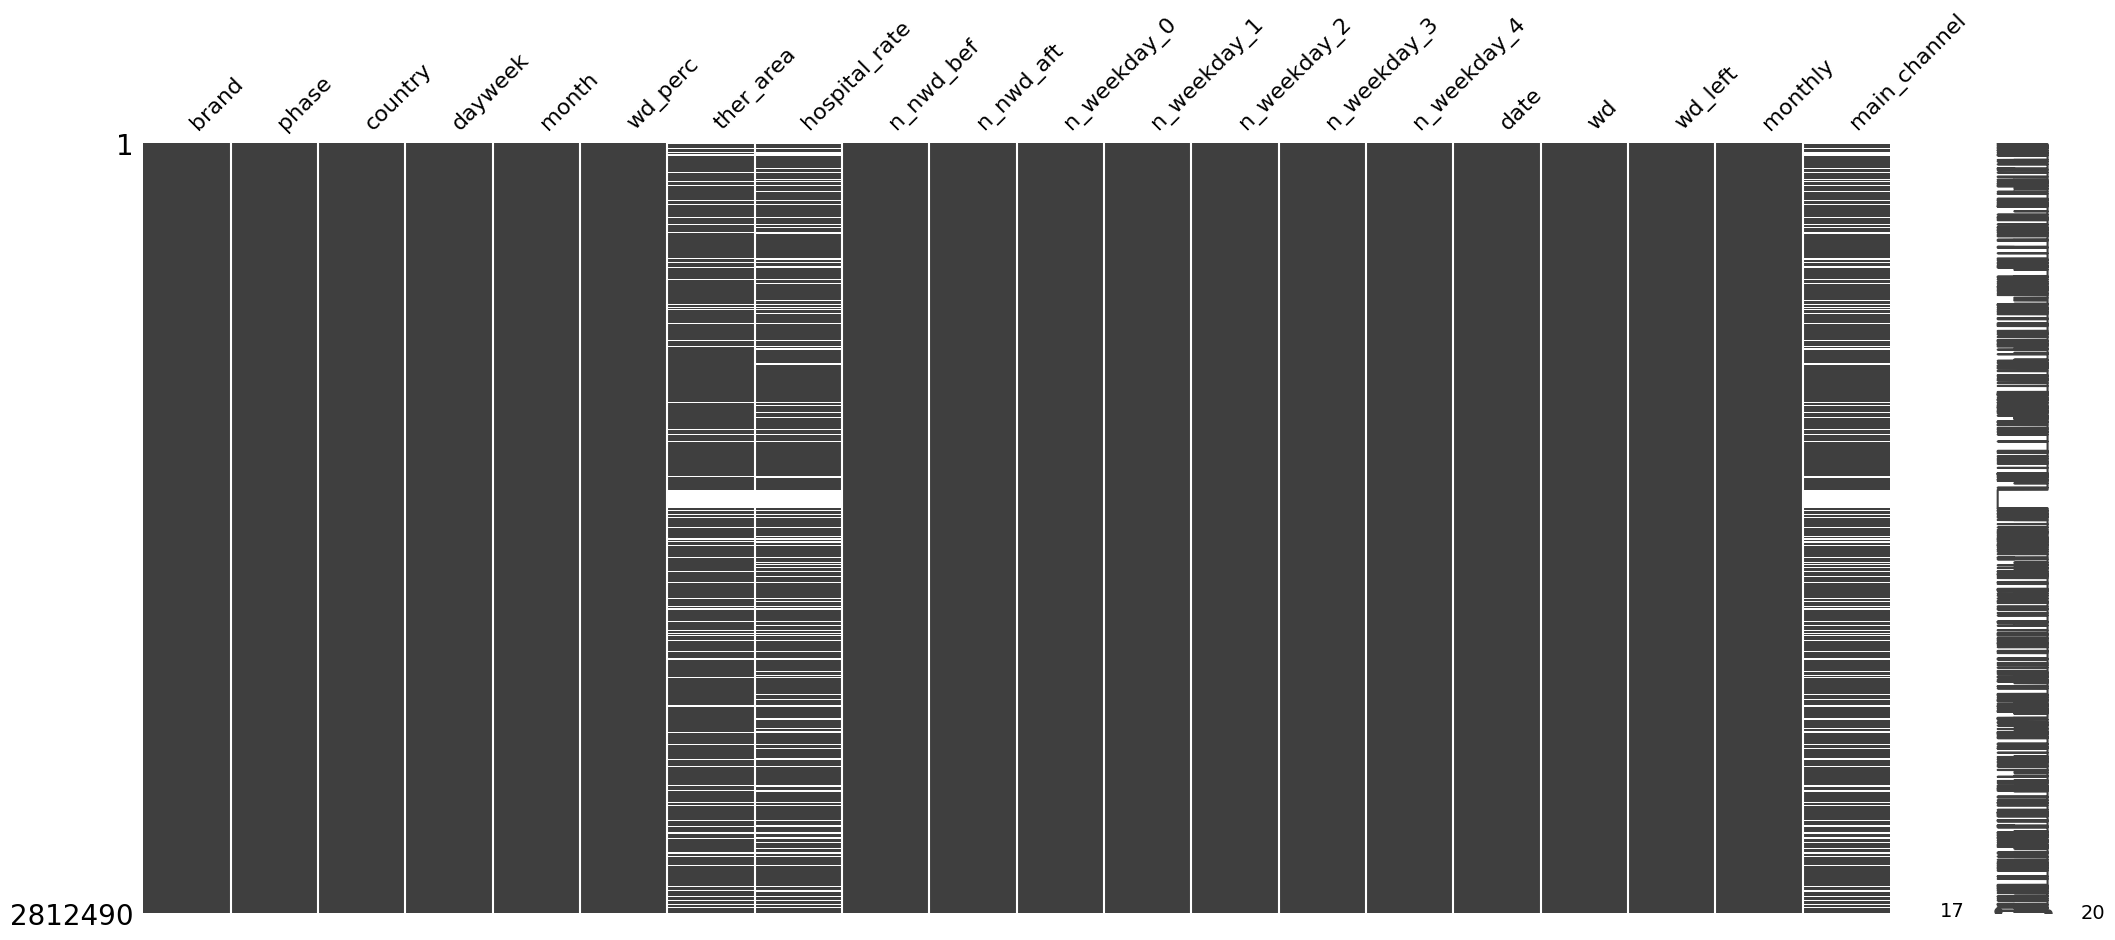

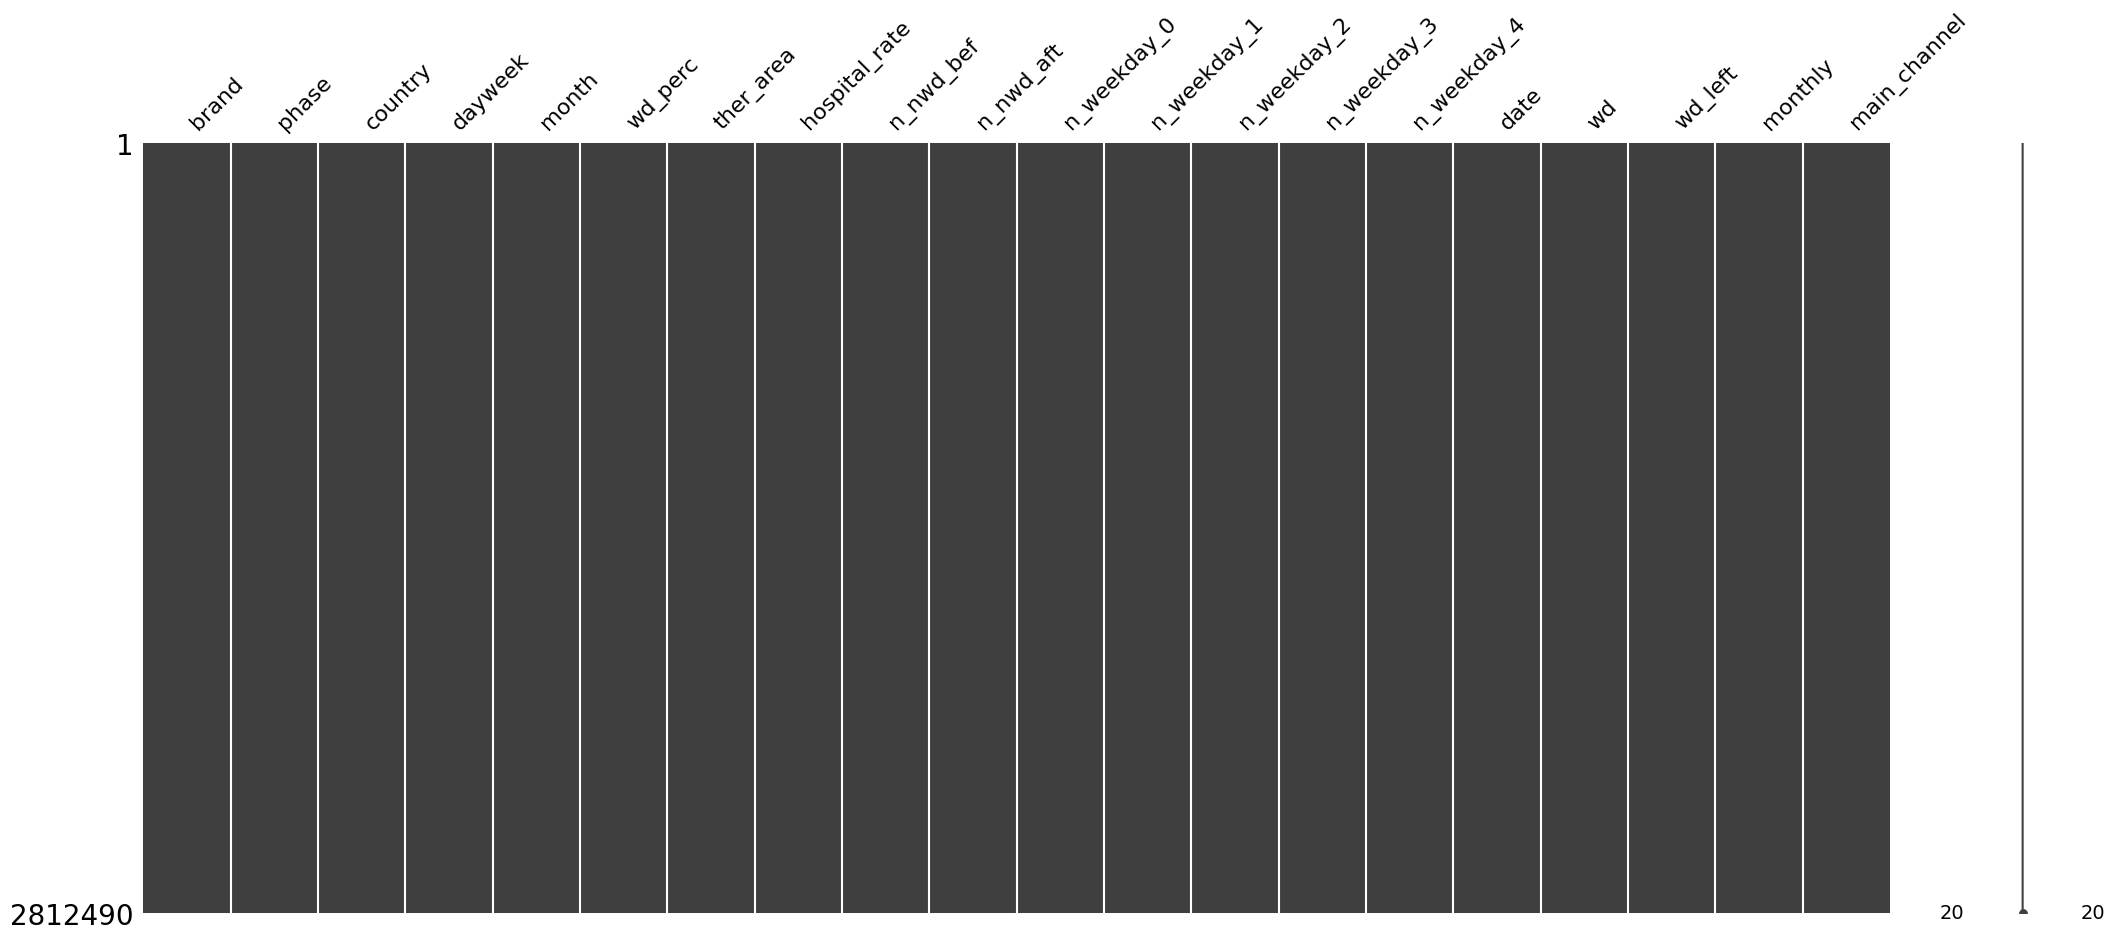

In [5]:
# Import the necessary packages
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Use missingno for visualizing missing values in filled and unfilled dataframes
msno.matrix(df_raw)
msno.matrix(df)
plt.show()

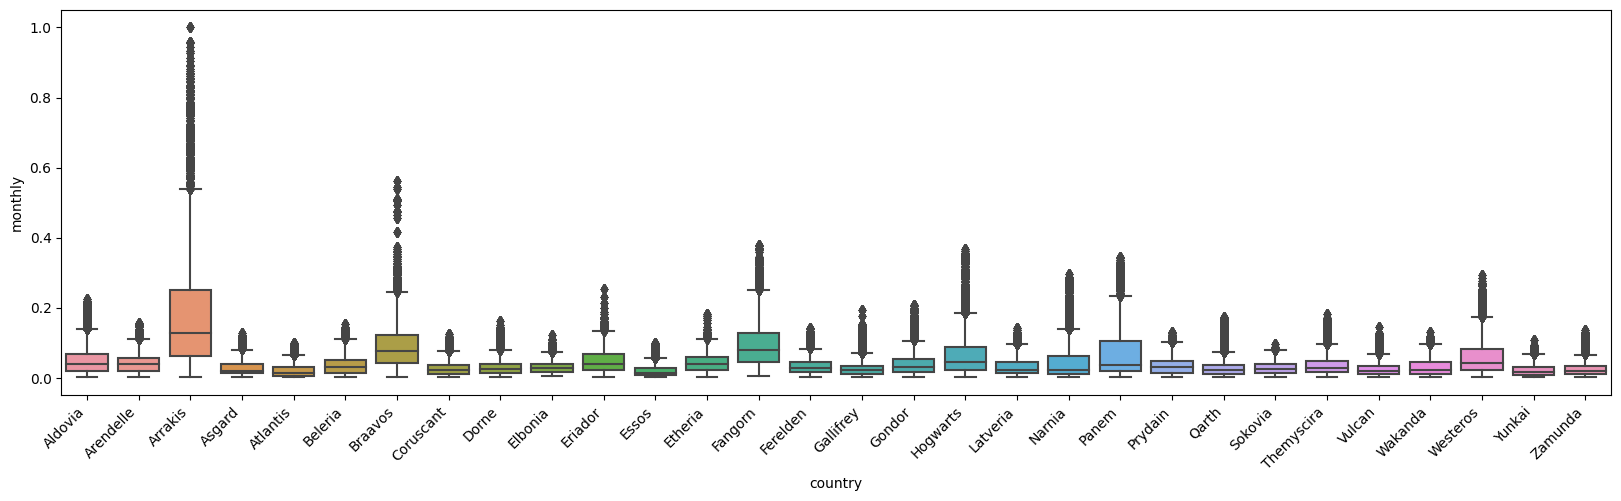

In [6]:
# Import necessary plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of "monthly" values across different countries
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x="country", y="monthly", data=df)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Display the plot
plt.show()

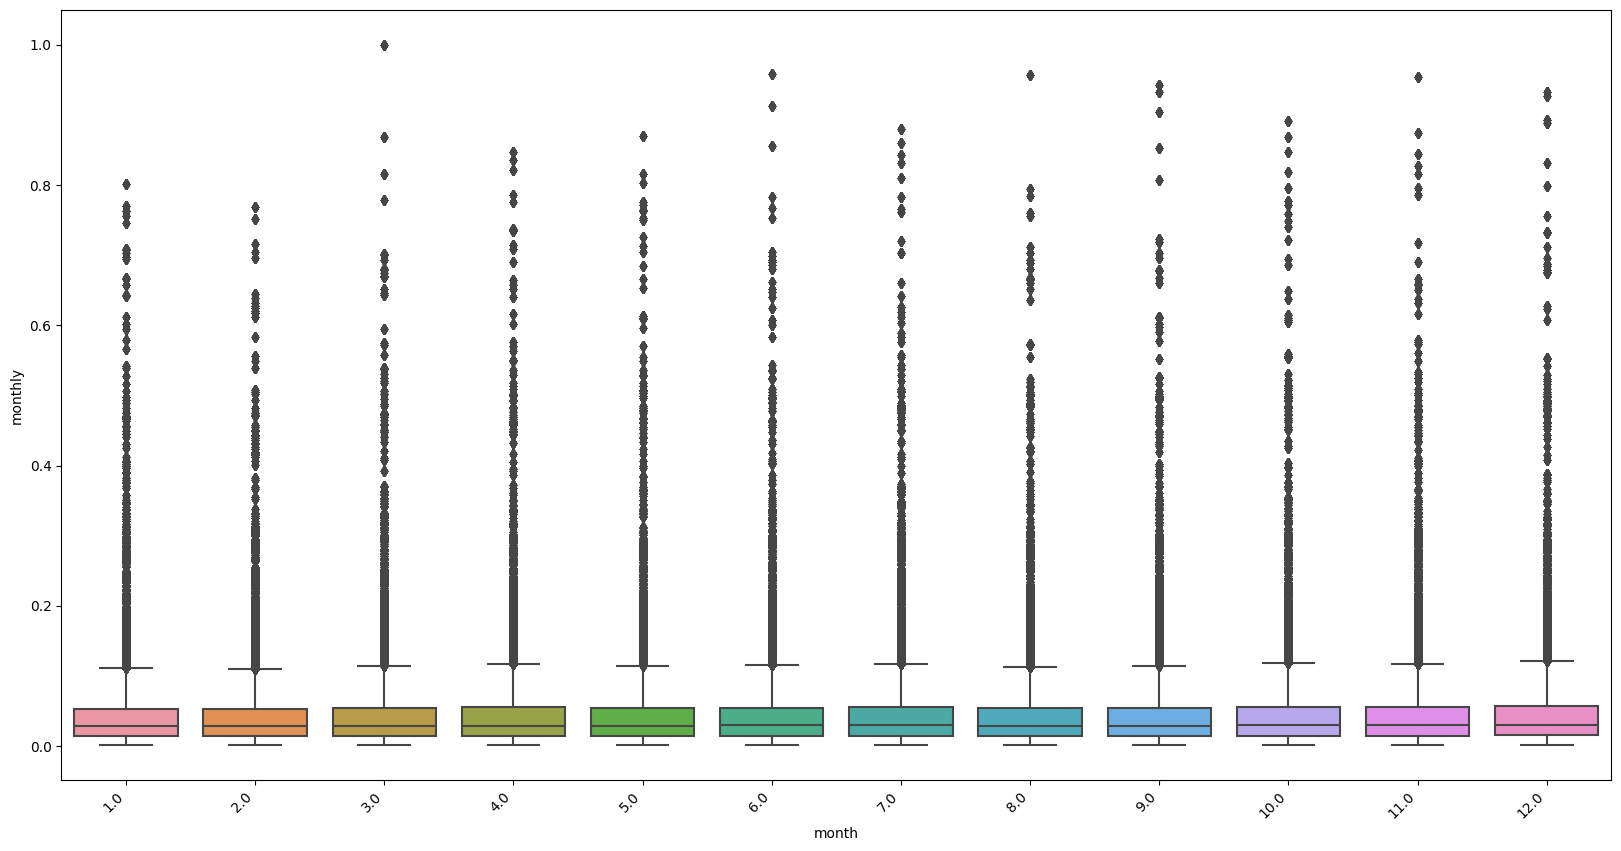

In [7]:
# Import necessary plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of "monthly" values across different months
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x="month", y="monthly", data=df)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Display the plot
plt.show()

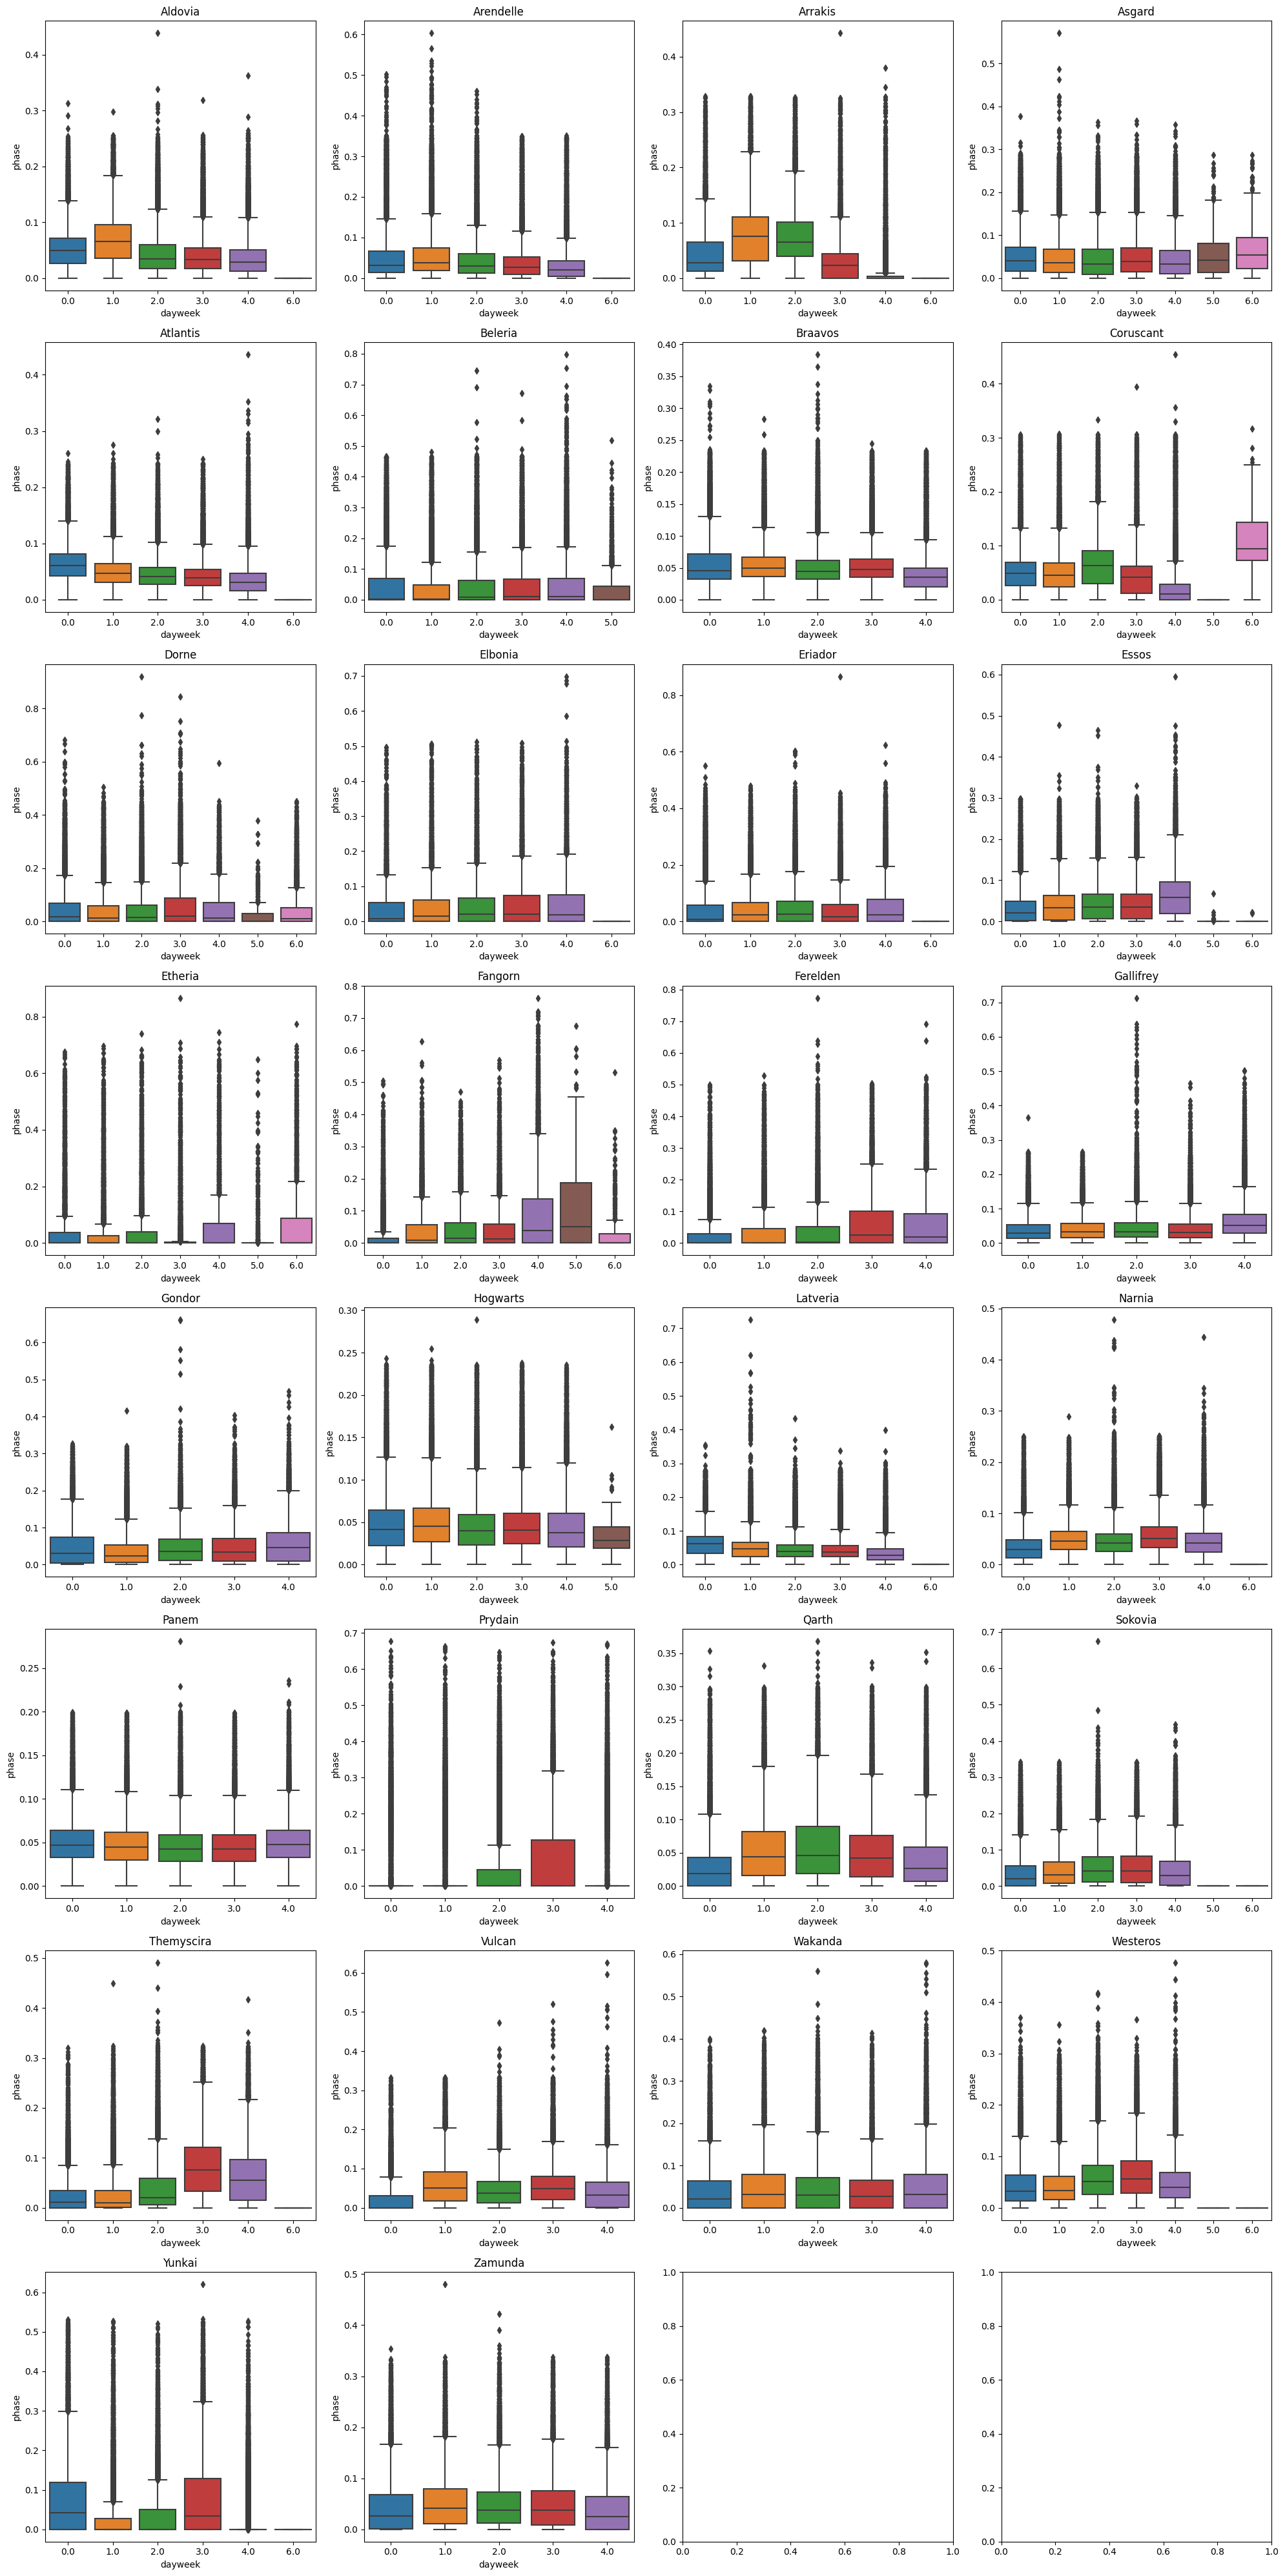

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Get unique countries in the dataframe
unique_countries = df.country.unique()

# Calculate the number of rows needed in the grid based on the number of unique countries
num_rows = math.ceil(len(unique_countries) / 4)

# Create subplots in a grid with 4 columns
fig, axes = plt.subplots(num_rows, 4, figsize=(20,40))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over unique countries and create a boxplot for each in the grid
for i, country in enumerate(unique_countries):
    ax = axes[i]
    sns.boxplot(x="dayweek", y="phase", data=df[df["country"] == country], ax=ax)
    ax.set_title(country)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

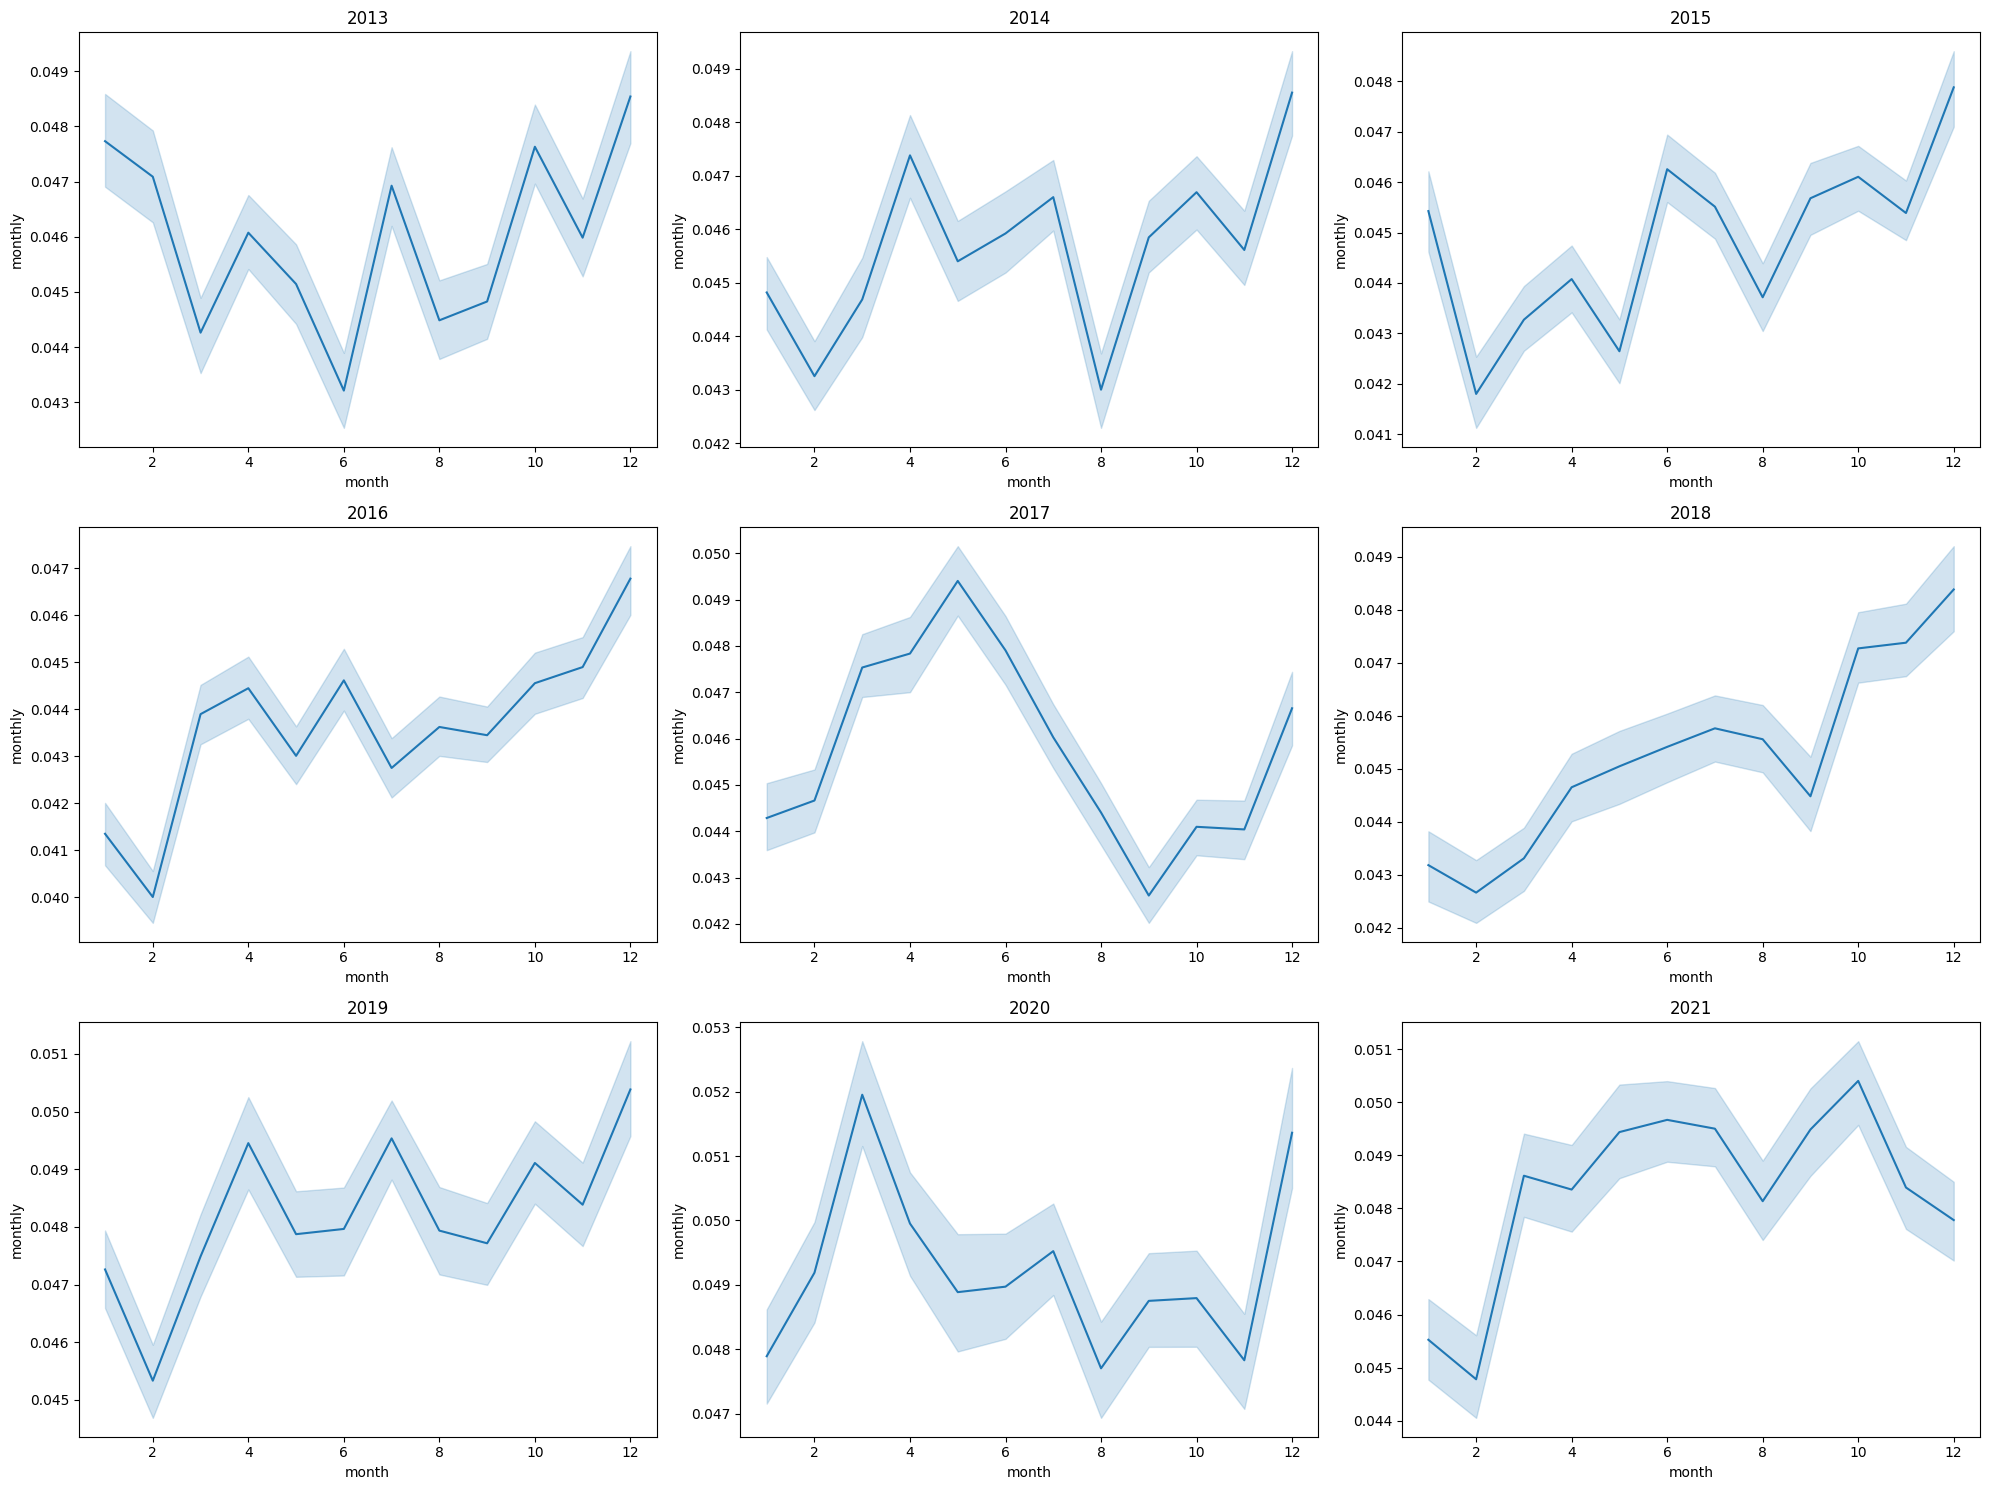

In [9]:
# Get unique countries in the dataframe
unique_year = df.date.dt.year.unique()

# Create subplots in a grid with 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over unique countries and create a boxplot for each in the grid
for i, year in enumerate(unique_year):
    ax = axes[i]
    sns.lineplot(x="month", y="monthly", data=df[df.date.dt.year == year], ax=ax)
    ax.set_title(year)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


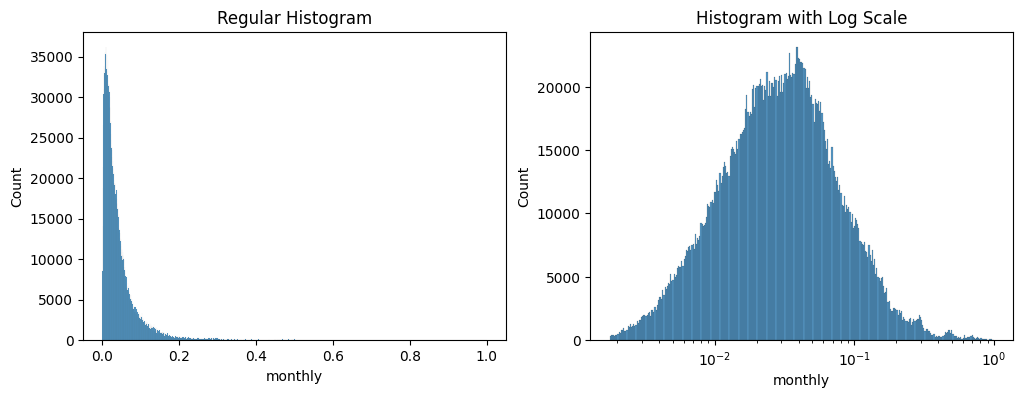

In [10]:
# Create a plot with two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the regular histogram on the first axis
sns.histplot(x="monthly", data=df, ax=ax1)

# Plot the histogram with a log scale on the second axis
sns.histplot(x="monthly", data=df, log_scale=True, ax=ax2)

# Set titles for the axes
ax1.set_title("Regular Histogram")
ax2.set_title("Histogram with Log Scale")

# Display the plot
plt.show()

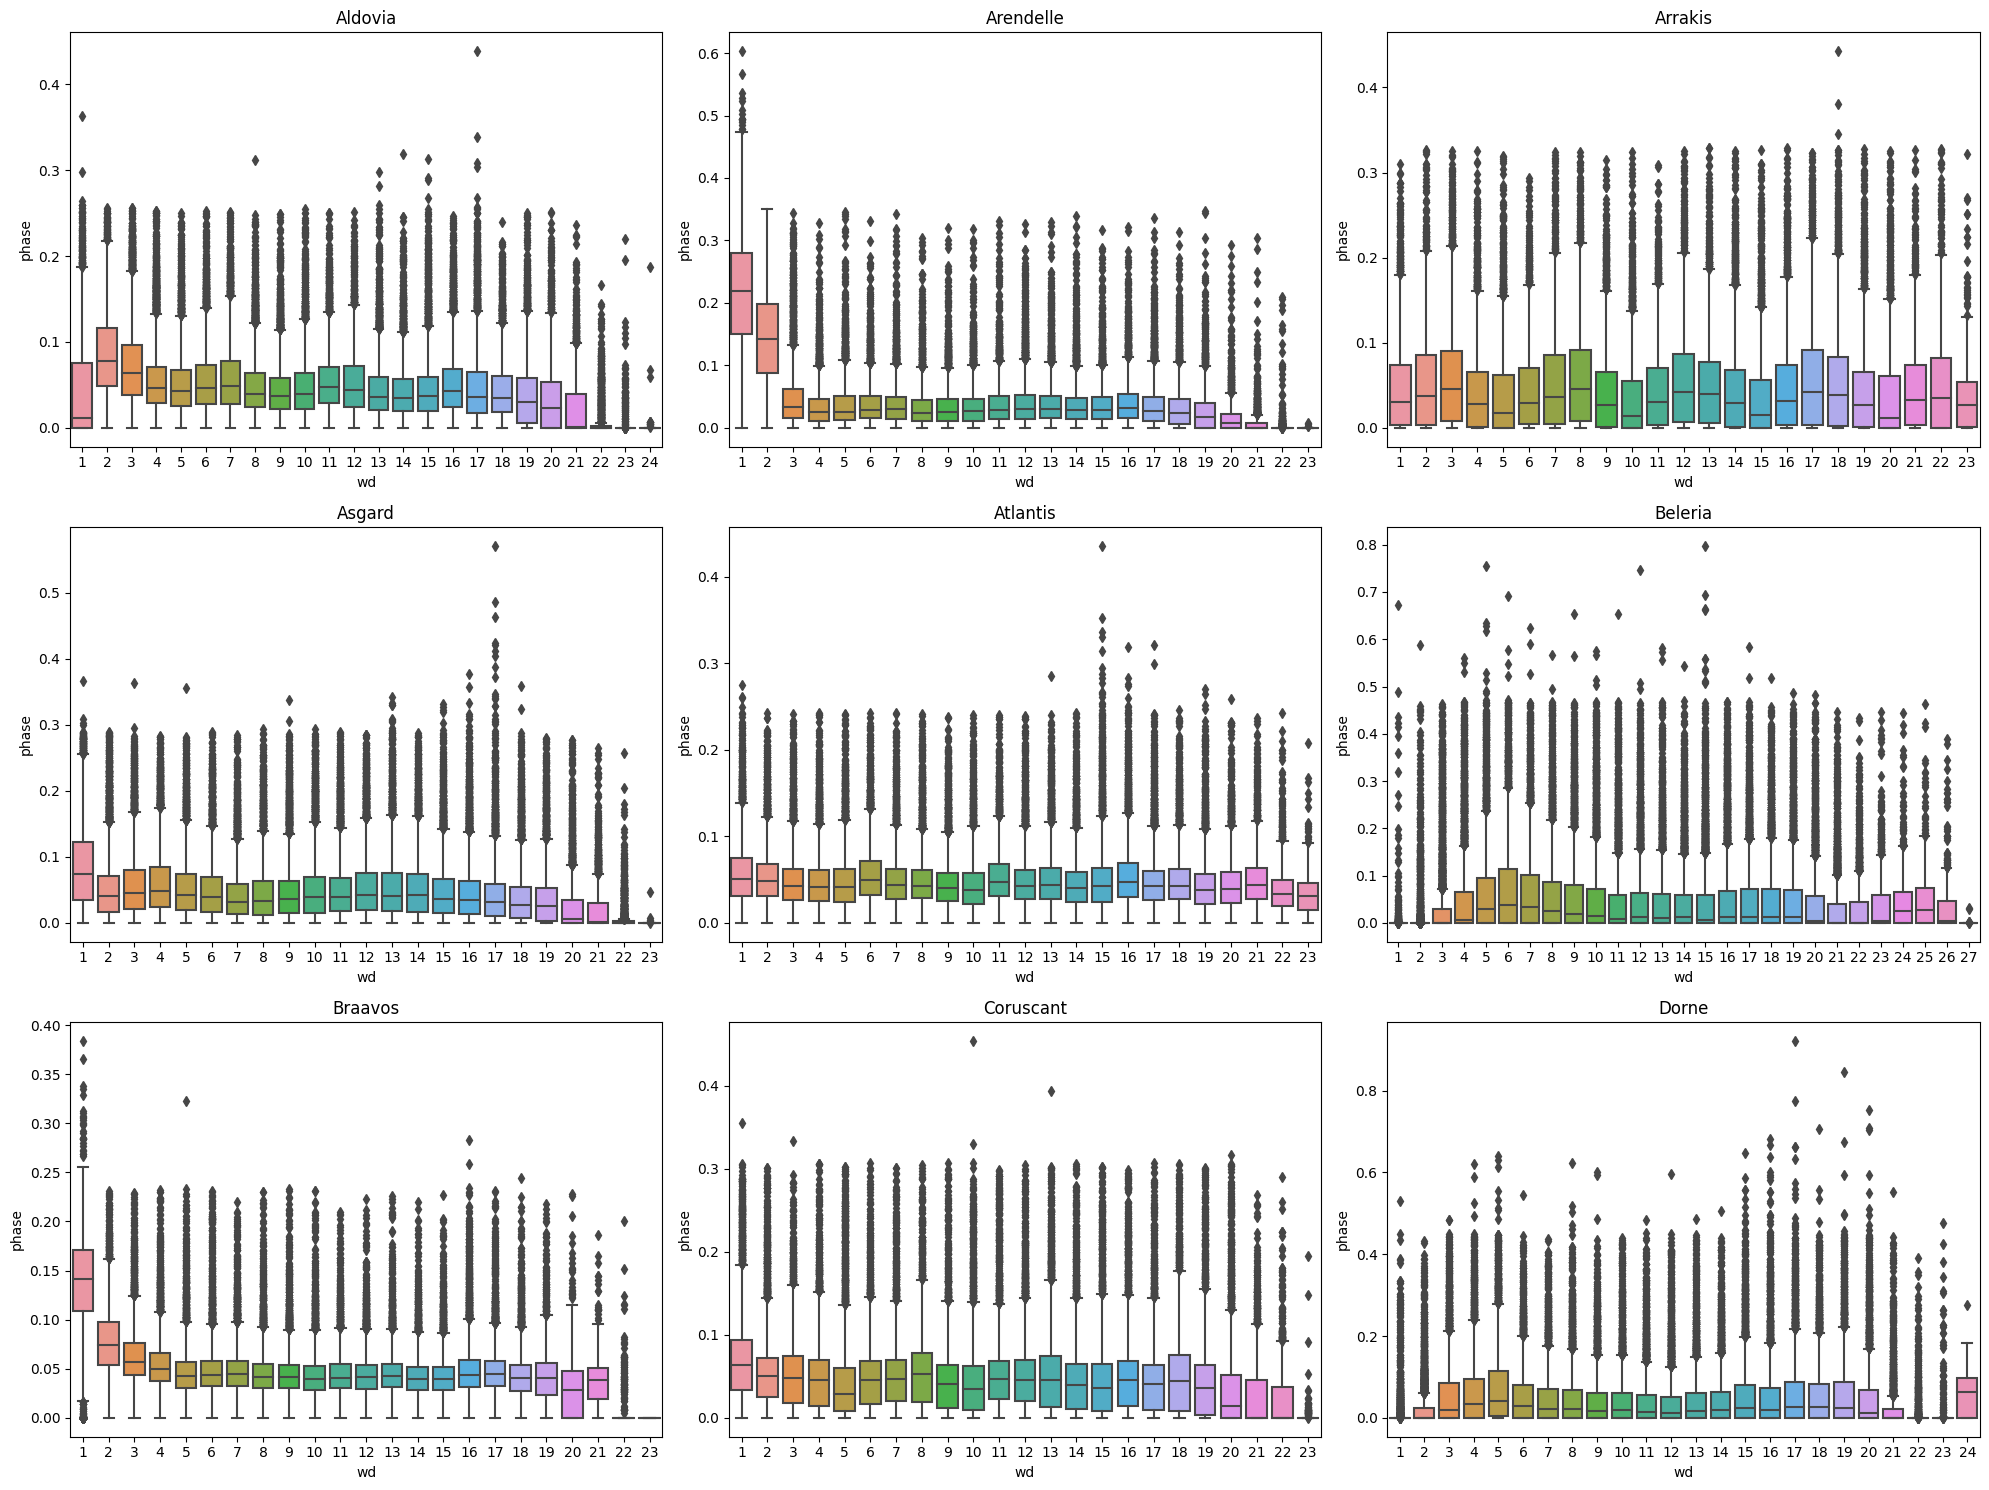

In [11]:
# Get unique countries in the dataframe
nine_countries = df.country.unique()[0:9]

# Create subplots in a grid with 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over unique countries and create a boxplot for each in the grid
for i, country in enumerate(nine_countries):
    ax = axes[i]
    sns.boxplot(x="wd", y="phase", data=df[df["country"] == country], ax=ax)
    ax.set_title(country)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

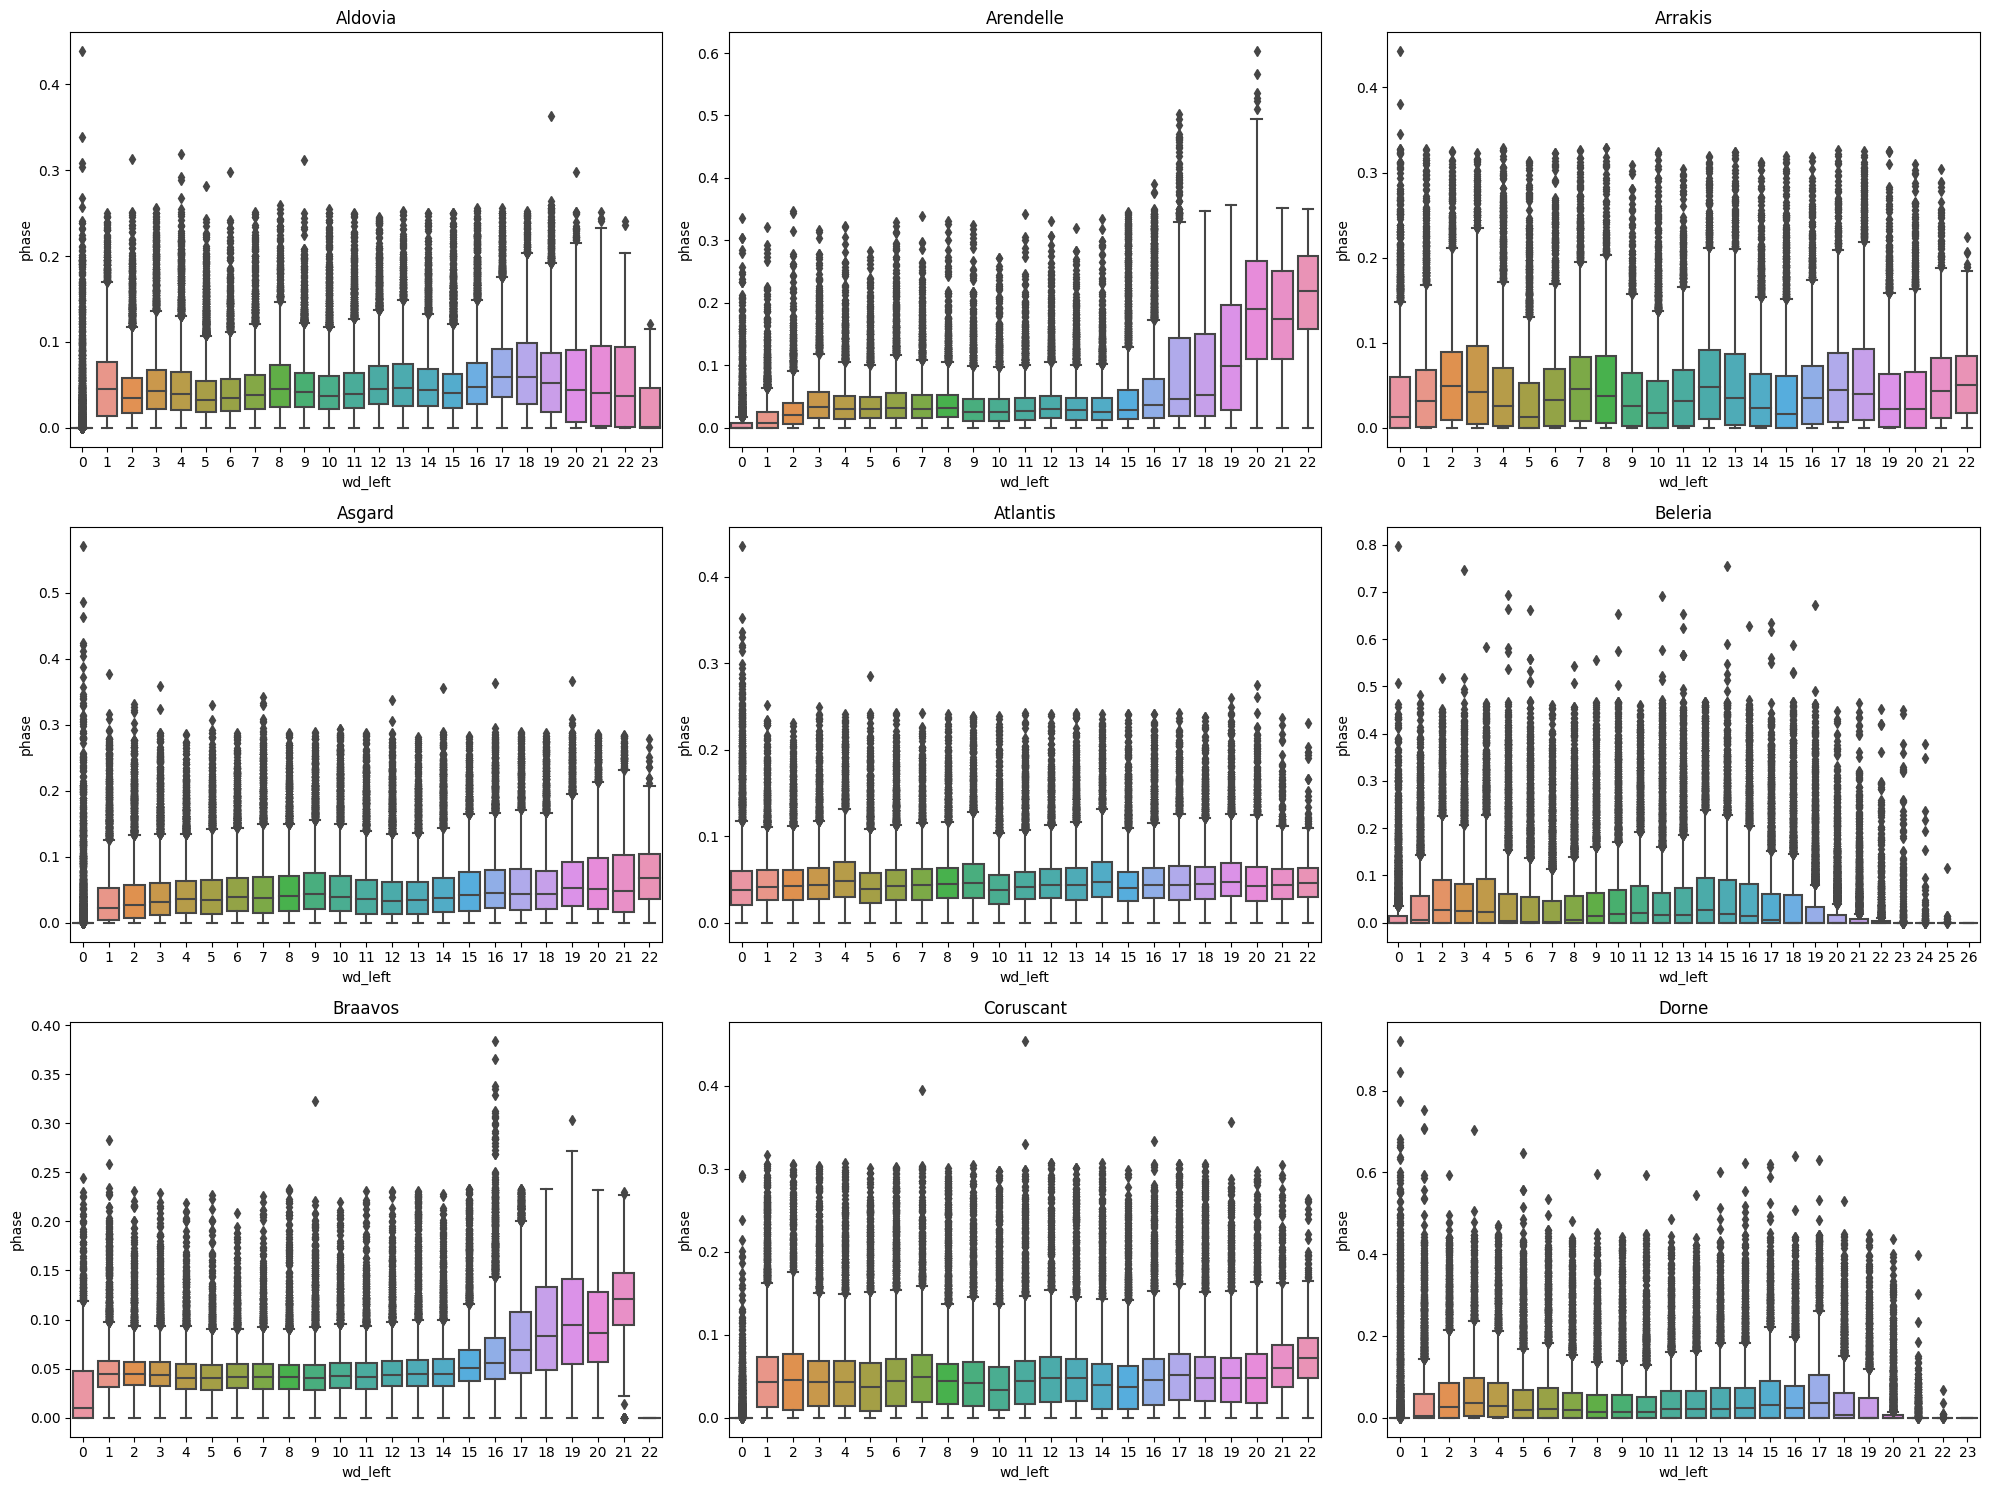

In [12]:
# Get unique countries in the dataframe
nine_countries = df.country.unique()[0:9]

# Create subplots in a grid with 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over unique countries and create a boxplot for each in the grid
for i, country in enumerate(nine_countries):
    ax = axes[i]
    sns.boxplot(x="wd_left", y="phase", data=df[df["country"] == country], ax=ax)
    ax.set_title(country)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

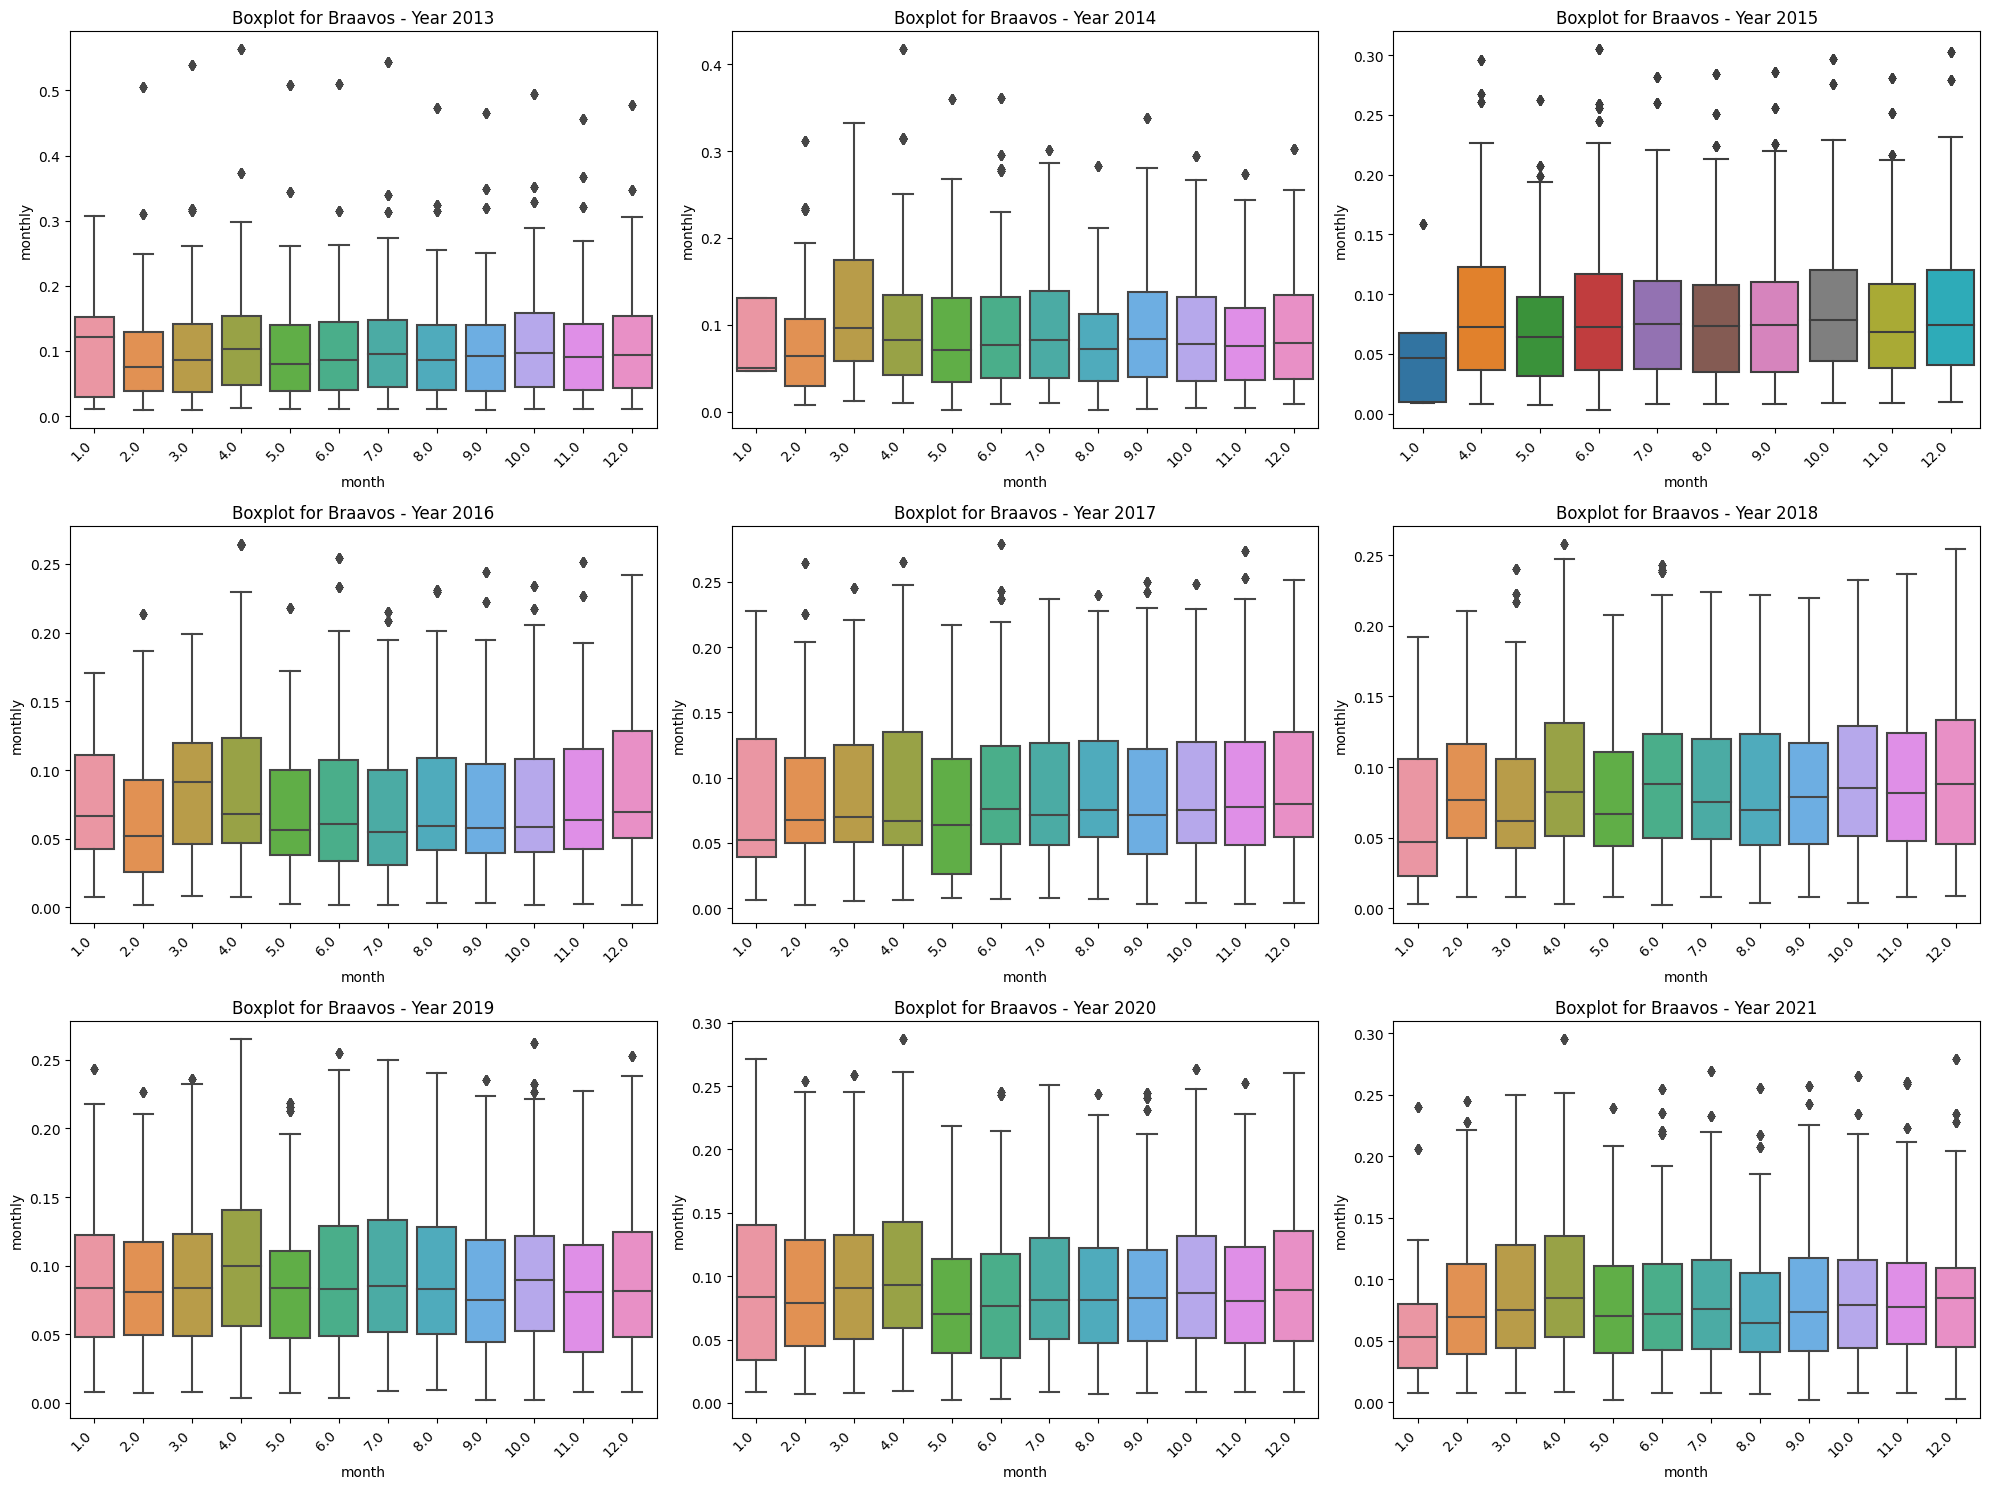

In [13]:
# Get unique years in the dataframe
unique_years = df['date'].dt.year.unique()

# Create subplots in a grid with 3 columns
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over unique years and create a boxplot for each in the grid
for i, year in enumerate(unique_years):
    ax = axes[i]

    # Filter data for the specified country ("Braavos") and year
    data_subset = df[(df['country'] == "Braavos") & (df['date'].dt.year == year)]

    # Create a boxplot
    sns.boxplot(x="month", y="monthly", data=data_subset, ax=ax)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

    # Add a title with the year
    ax.set_title(f'Boxplot for Braavos - Year {year}')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
# Count the number of occurrences of each combination and number of country-brand combinations
combination_counts = df.groupby(["country", "brand"]).size().reset_index(name='Counts')
print(combination_counts.sort_values(by='Counts', ascending=False))

       country  brand  Counts
1705    Narnia  YOWYI    2270
1665    Narnia  PJZBL    2270
1617    Narnia  BBIDC    2270
248    Arrakis  PLNDT    2270
1410  Hogwarts  BBIDC    2260
...        ...    ...     ...
2405  Westeros  BELQI      19
2597   Zamunda  CUEHC      19
4      Aldovia  BELQI      19
836    Elbonia  HFUTE      18
2320   Wakanda  EQZWB      17

[2684 rows x 3 columns]


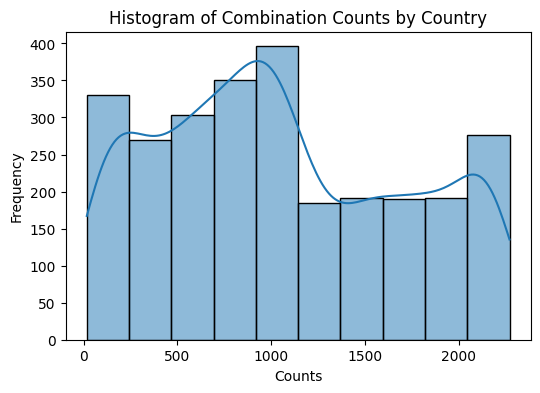

In [15]:
# Assuming you already have the combination_counts DataFrame
combination_counts = df.groupby(["country", "brand"]).size().reset_index(name='Counts')

# Create a histogram plot
plt.figure(figsize=(6, 4))
sns.histplot(data=combination_counts, x='Counts', bins=10, kde=True)

# Add labels and title
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Combination Counts by Country')

# Show the plot
plt.show()